In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from catboost import CatBoostRegressor
import shap
shap.initjs()

In [2]:
%load_ext autoreload
%autoreload 1
%aimport src.models.features
from src.models.features import FEATURES

In [3]:
DATA_PATH = Path('../../data')
df = pd.read_parquet(DATA_PATH.joinpath('processed', 'train.parquet'))

In [4]:
df.head()

,avg_attendance_1_yr_ago,avg_attendance_2_yr_ago,avg_attendance_3_yr_ago,is_holiday,Year,Month,Week,DayNight,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Stadium_Capacity,HomeTeam_cLI,HomeTeam_Rank,HomeTeam_W,HomeTeam_Streak_count,HomeTeamGameNumber,VisitingTeam_cLI,VisitingTeam_Rank,VisitingTeam_L,VisitingTeam_Streak_count,VisitingTeamGameNumber,Attendance_TRUTH_y,BallParkID_0,BallParkID_1,BallParkID_2,BallParkID_3,BallParkID_4,BallParkID_5,BallParkID_6,BallParkID_7,BallParkID_8,BallParkID_9,BallParkID_10,BallParkID_11,BallParkID_12,BallParkID_13,Dayofweek_0,Dayofweek_1,Dayofweek_2,Dayofweek_3,Dayofweek_4
32282,-2.082841,-2.122220,-1.790324,-0.131702,-1.434624,0.819604,0.943878,0.703148,0.906472,-0.187673,-0.183029,-0.106184,-0.104324,0.0,0.0,-2.020384,-1.154481,0.739929,0.559998,-1.259706,0.848306,1.552179,-1.357866,0.442789,1.641721,0.826945,10643.0,-0.112630,-0.120373,0.119375,-0.080934,0.108172,0.114737,-0.064344,-0.076977,0.089777,0.123538,-0.083043,0.063698,0.128505,0.089549,-0.090821,-0.061823,-0.084927,-0.060349,0.063794
4105,-1.200575,-0.626283,-1.016037,-0.131702,1.629959,0.242278,0.022670,0.703148,-0.015428,-0.187673,-0.183029,-0.106184,-0.104324,0.0,0.0,-0.528849,-0.676524,0.050825,-0.050635,0.707784,0.016573,-1.172448,0.717093,0.524485,-0.690299,-0.004814,26023.0,-0.052768,-0.071878,0.046971,-0.004442,0.085704,0.108550,0.000476,-0.054859,0.002589,0.024849,-0.076542,0.029497,0.056099,0.016268,0.112100,0.101395,0.078125,0.080447,-0.103081
18548,0.686211,1.166071,1.172837,-0.131702,1.629959,-1.489701,-1.556544,0.703148,-1.614644,-0.187673,-0.183029,-0.106184,-0.104324,0.0,0.0,-0.326301,-0.075663,0.739929,-1.516154,0.314286,-1.497609,0.495691,-0.666213,-1.477073,-0.301629,-1.497714,28506.0,0.149396,0.097552,-0.127192,0.138184,-0.064029,-0.053978,0.287703,0.177124,-0.197107,-0.109744,0.152957,-0.162488,-0.073042,-0.163429,0.100673,0.101767,0.106345,0.087647,-0.089956
20854,-0.000189,0.239585,0.224864,-0.131702,-0.208791,-0.335048,-0.503735,0.703148,-0.429343,-0.187673,-0.183029,-0.106184,-0.104324,0.0,0.0,1.595727,0.716380,-0.638280,-0.132053,0.314286,-0.452611,-0.838820,1.408746,-0.169933,-0.301629,-0.431357,46883.0,0.100654,0.126087,-0.083771,0.078148,-0.057137,-0.079154,0.272491,0.162255,-0.188489,-0.078933,0.125958,-0.208323,-0.051900,-0.111986,-0.090821,-0.061823,-0.084927,-0.060349,0.063794
19471,-2.125284,-2.044939,-2.112316,-0.131702,-0.004485,-0.335048,-0.635336,-1.422175,-0.542229,-0.187673,-0.183029,-0.106184,-0.104324,0.0,0.0,-1.443900,0.743692,-0.638280,-0.417015,-1.653204,-0.537917,0.884924,-0.666213,-0.619262,1.253051,-0.495338,13208.0,-0.082132,-0.106243,0.086773,-0.124183,0.134868,0.105631,-0.088312,-0.089070,0.086147,0.097953,-0.102439,0.093171,0.107434,0.123668,-0.060418,-0.084145,-0.074953,-0.047097,0.057484


In [5]:
df.shape

(32624, 46)

In [7]:
X = df.drop('Attendance_TRUTH_y', axis='columns').select_dtypes(['int', 'float'])
y = df['Attendance_TRUTH_y']

In [8]:
reg = CatBoostRegressor(loss_function='RMSE', random_seed=42)
reg.fit(X, y, verbose=False, plot=False)

In [9]:
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


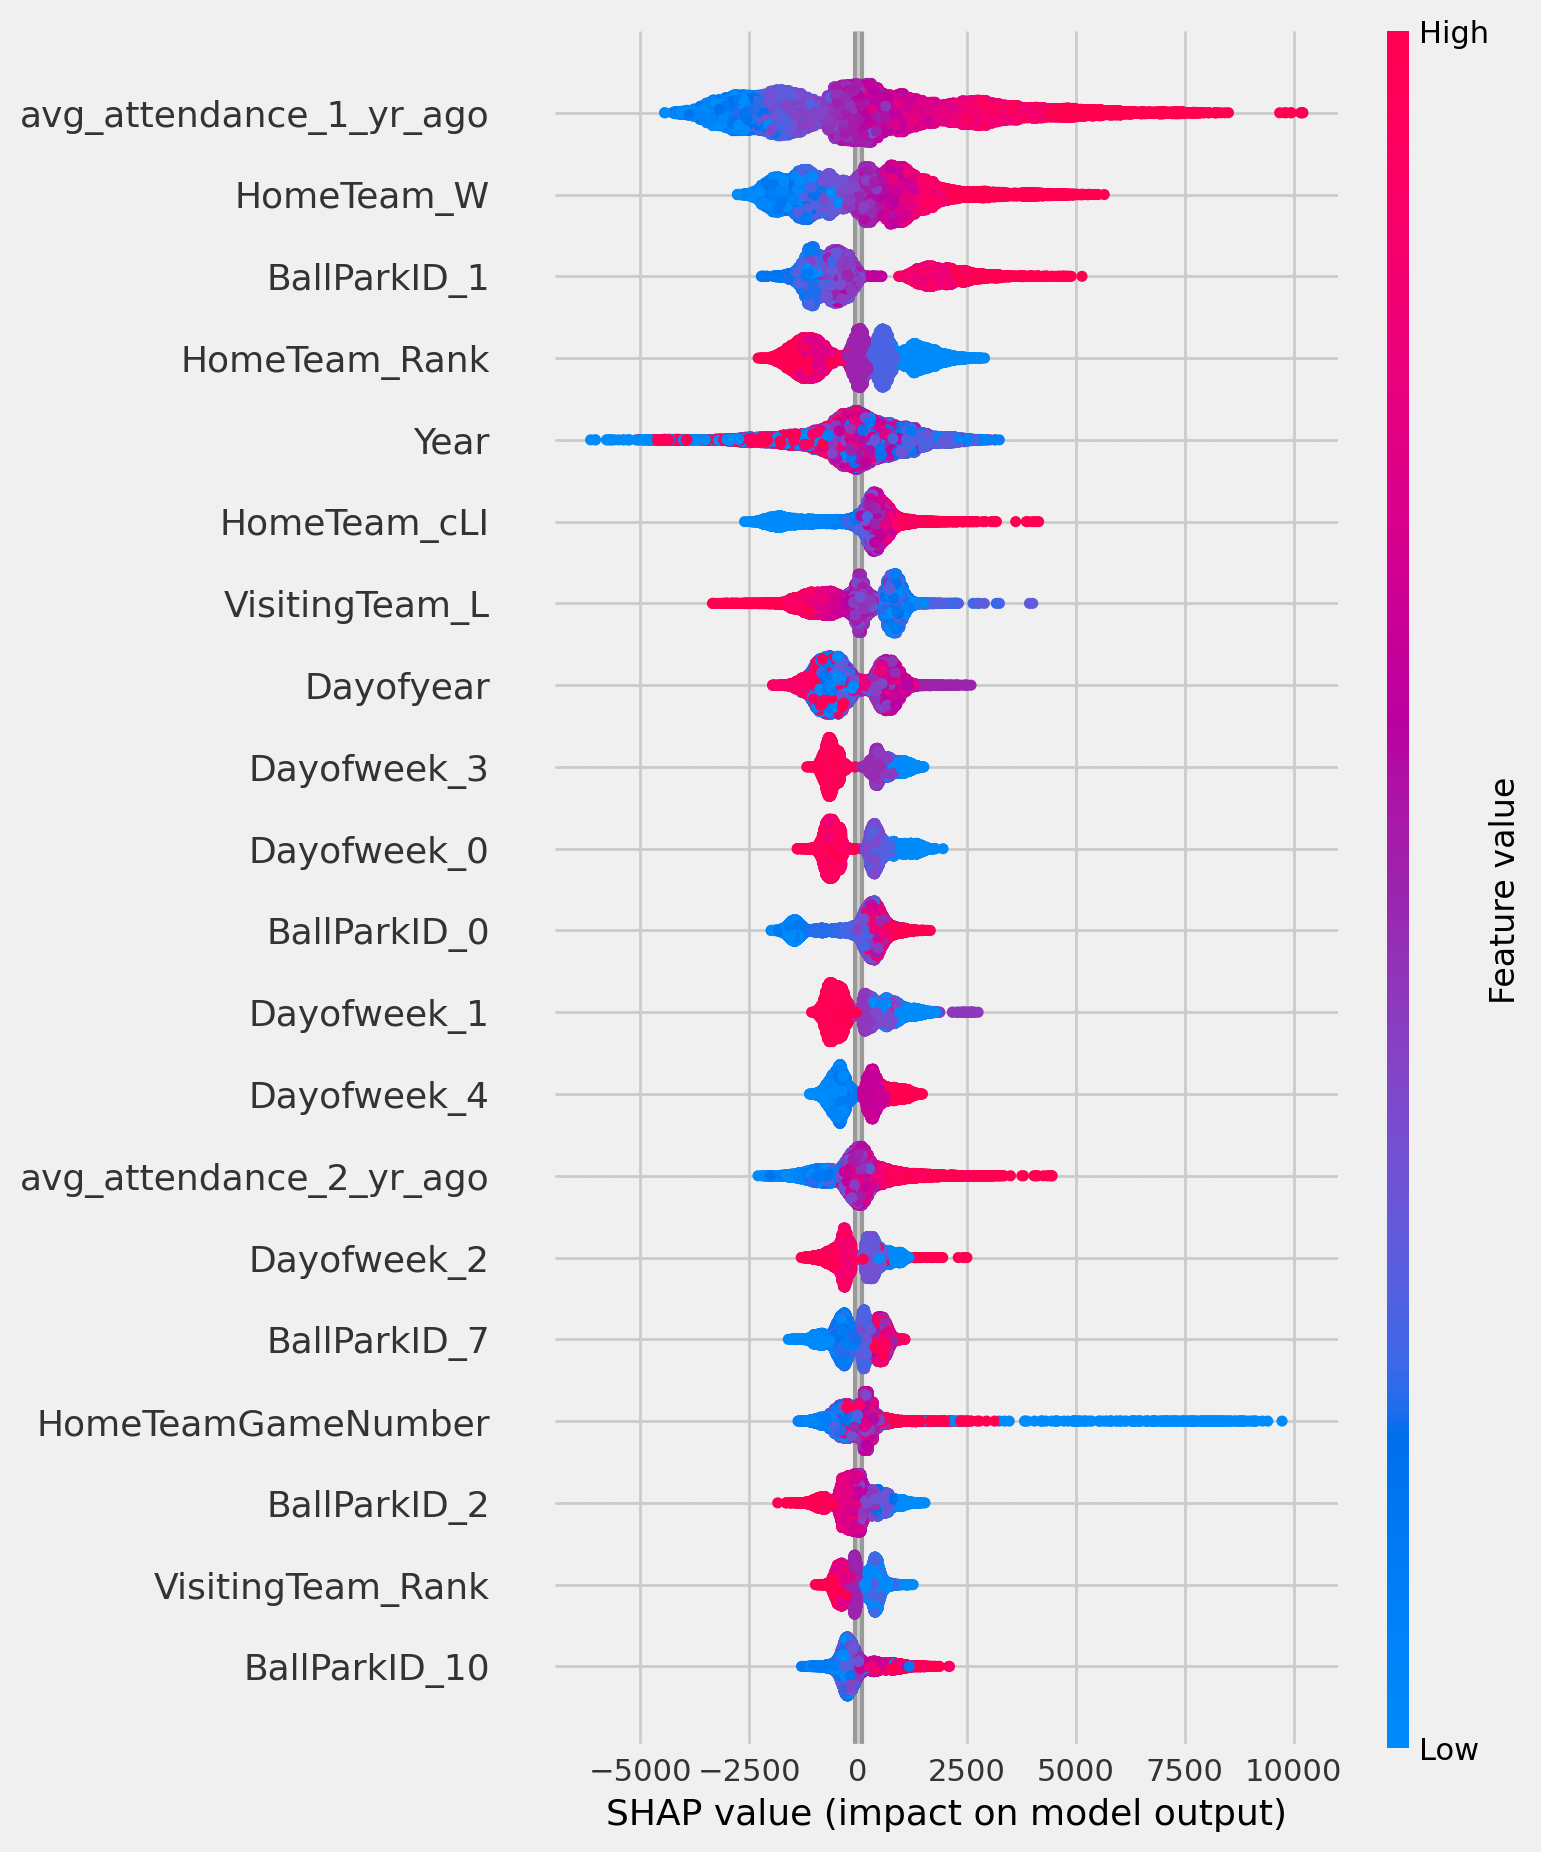

In [10]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [11]:
df.columns.tolist()

['avg_attendance_1_yr_ago',
 'avg_attendance_2_yr_ago',
 'avg_attendance_3_yr_ago',
 'is_holiday',
 'Year',
 'Month',
 'Week',
 'DayNight',
 'Dayofyear',
 'Is_month_end',
 'Is_month_start',
 'Is_quarter_end',
 'Is_quarter_start',
 'Is_year_end',
 'Is_year_start',
 'Stadium_Capacity',
 'HomeTeam_cLI',
 'HomeTeam_Rank',
 'HomeTeam_W',
 'HomeTeam_Streak_count',
 'HomeTeamGameNumber',
 'VisitingTeam_cLI',
 'VisitingTeam_Rank',
 'VisitingTeam_L',
 'VisitingTeam_Streak_count',
 'VisitingTeamGameNumber',
 'Attendance_TRUTH_y',
 'BallParkID_0',
 'BallParkID_1',
 'BallParkID_2',
 'BallParkID_3',
 'BallParkID_4',
 'BallParkID_5',
 'BallParkID_6',
 'BallParkID_7',
 'BallParkID_8',
 'BallParkID_9',
 'BallParkID_10',
 'BallParkID_11',
 'BallParkID_12',
 'BallParkID_13',
 'Dayofweek_0',
 'Dayofweek_1',
 'Dayofweek_2',
 'Dayofweek_3',
 'Dayofweek_4']